In [2]:
import pandas as pd

In [3]:
import numpy as np 
import matplotlib as mpl
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

In [4]:
data = pd.read_excel("C:/Users/RUCHI/Downloads/lrm.xlsx")
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


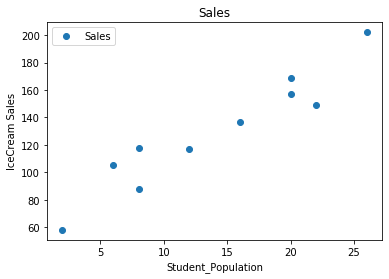

In [5]:
data.plot('Student_Population','Sales',style='o')
plt.ylabel('IceCream Sales')
plt.title('Sales')
plt.show()

In [6]:
import statsmodels.api as s
St_pop = data['Student_Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = s.OLS(sales,st_pop)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        22:01:25   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [9]:
#for regression equation
x= data['Student_Population'].values.reshape(-1,1)
y= data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.intercept_[0],reg.coef_[0][0]

(60.0, 5.0)

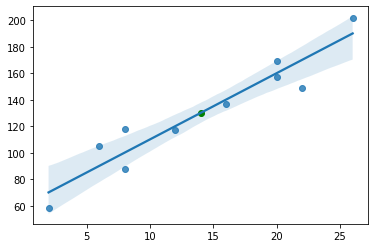

In [11]:
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color="green")

In [8]:
#Python Code for Prediction Interval
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2 = summary_table(result1,alpha=0.05)
fittedvalues = data1[:,2]
predict_mean_se = data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp = data1[:,4:6].T
predict_ci_low,predict_ci_upp = data1[:,6:8].T

In [12]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [13]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [14]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [15]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

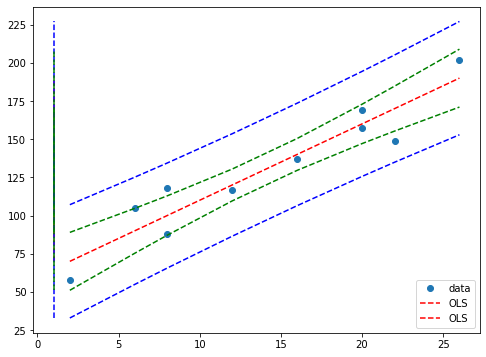

In [16]:
X = s.add_constant(x)
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(x,y,'o',label='data')
ax.plot(X,fittedvalues,'r--',label='OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()